In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Dataset

In [2]:
dataframe=pd.read_csv("C:/Users/ANIKET/PythonCourseFiles/Zomato_Restaurants_Analysis/Zomato_data.csv")

In [3]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
#Checking dataset for data type, null values,etc.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


# Converting Datatype of rate column

In [5]:
#Rating added as string in file in 'rate/5; format.
#For analysis I have to remove '/5' as I just want rating. 

def rateDtypeConvert(value):
    value=str(value).split("/")
    value=value[0]
    return float(value) #Converting datatype into float
    
dataframe['rate']=dataframe['rate'].apply(rateDtypeConvert)


# Type of Restaurants

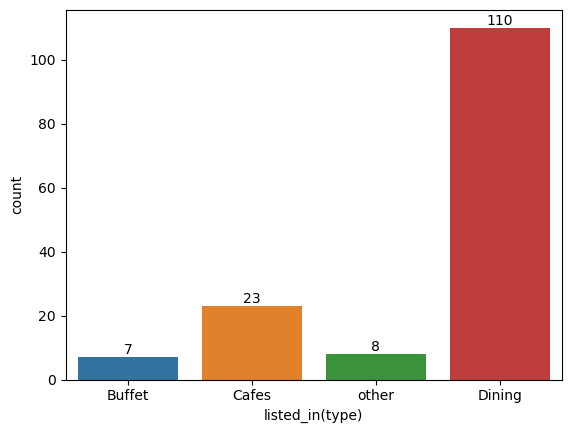

In [6]:
a=sns.countplot(x='listed_in(type)', data=dataframe)

for x in a.containers:
    a.bar_label(x)

From Graph, we can say that majority of restaurants comes under 'Dining' category.

# Votes for Restaurants

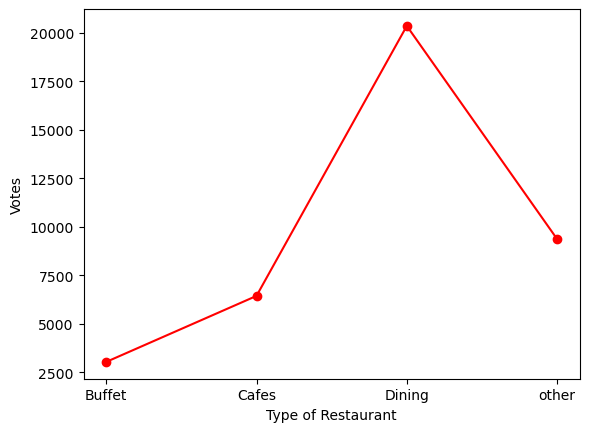

In [7]:
df=dataframe.groupby(['listed_in(type)'],as_index=False)['votes'].sum()
typeR=pd.Series(df['listed_in(type)'])
votes=pd.Series(df['votes'])
plt.plot(typeR, votes, marker='o',c='red')
plt.xlabel('Type of Restaurant')
plt.ylabel('Votes')   
plt.show()

From Graph, we can conclude that Dining restaurants received maximum votes for rating

# Rating Distribution

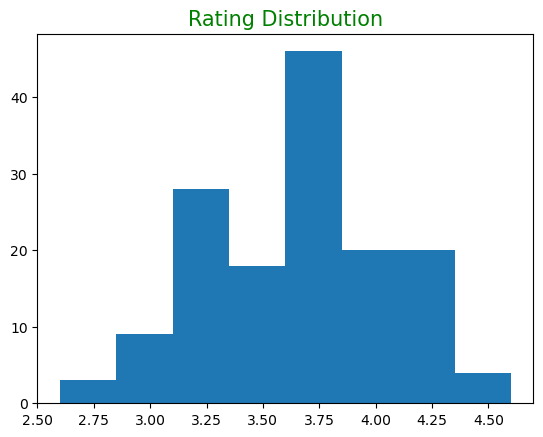

In [8]:
plt.hist(dataframe['rate'], bins=8)
plt.title("Rating Distribution", c='green',size=15)
plt.show()

From Graph, we can say maximum restaurants received rating in between 3.5-4.0

# Average cost spend for 2 people 

<Axes: xlabel='online_order', ylabel='rate'>

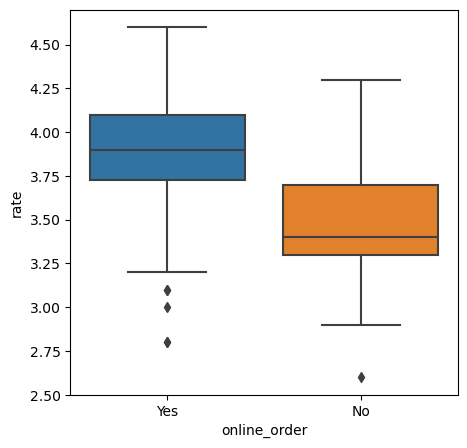

In [9]:
plt.figure(figsize=(5,5))
sns.boxplot(x='online_order', y='rate',data=dataframe)

From graph, majority couples are preferring to order food from restaurants having cost of food for 2 people is around 300 Rs/.



# Which mode getting good rating (Online/Offline)

<Axes: xlabel='online_order', ylabel='rate'>

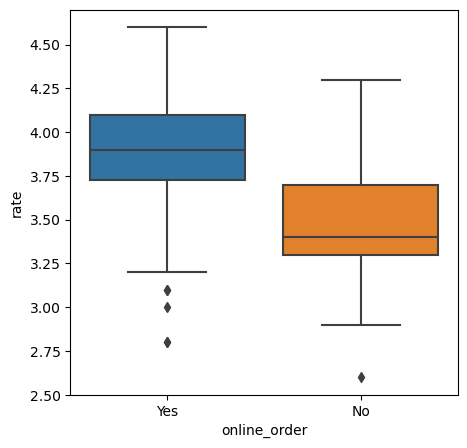

In [10]:
plt.figure(figsize=(5,5))
sns.boxplot(x='online_order', y='rate', data=dataframe)

From graph, conclude that people who ordering food online giving maximum rating to restaurants than offline order received.

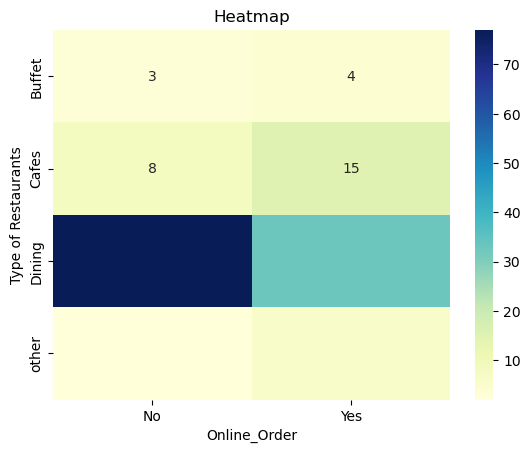

In [11]:
pivot_table= dataframe.pivot_table(index='listed_in(type)', columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online_Order')
plt.ylabel('Type of Restaurants')
plt.show()

From Graph, we can say Dining Restaurants getting offline orders more than online. While Cafes receving online order more than offline.
So people likes to go to Dining Restaurants and enjoying meals at restaurants but for cafes people likes to order food online rather than enjoying it in cafes. 